In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# read data
df = pd.read_csv('/content/drive/MyDrive/project/hcvdat0.csv')


# check first few rows
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [4]:
print(df.dtypes)
print(df.isnull().sum())

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [5]:
# Shuffle dataset
print(df.head())
df = df.sample(frac = 1)
print(df.head())

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
     Unnamed: 0       Category  Age Sex   ALB    ALP   ALT    AST   BIL  \
599         600    3=Cirrhosis   59   m  36.0   49.7   5.2  110.1  37.0   
403         404  0=Blood Donor   45   f  37.5   54.3  12.9   14.8   5.9   
192         193  0=Blood Donor   49   m  44.3   84.1  29.0   29.0  16.2   
263         264  0=Blood Donor   58   m  44.0   56.0  30.

In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Unnamed: 0')  # Drop ID column
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [7]:
# Generate a dataframe with only the numeric cols
numeric_df = df[numeric_cols].copy()
print(numeric_df.head())
print(numeric_df.shape)

     Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA   GGT  PROT
599   59  36.0   49.7   5.2  110.1  37.0   2.29  3.68  118.2  56.9  74.8
403   45  37.5   54.3  12.9   14.8   5.9   6.95  5.29   66.0  49.4  70.1
192   49  44.3   84.1  29.0   29.0  16.2   8.18  4.65   87.0  21.9  70.8
263   58  44.0   56.0  30.6   33.0   4.8  12.37  6.33   74.0  58.7  75.8
231   53  44.8  119.7  29.2   20.7   6.0  13.80  8.78   64.0  49.3  75.4
(615, 11)


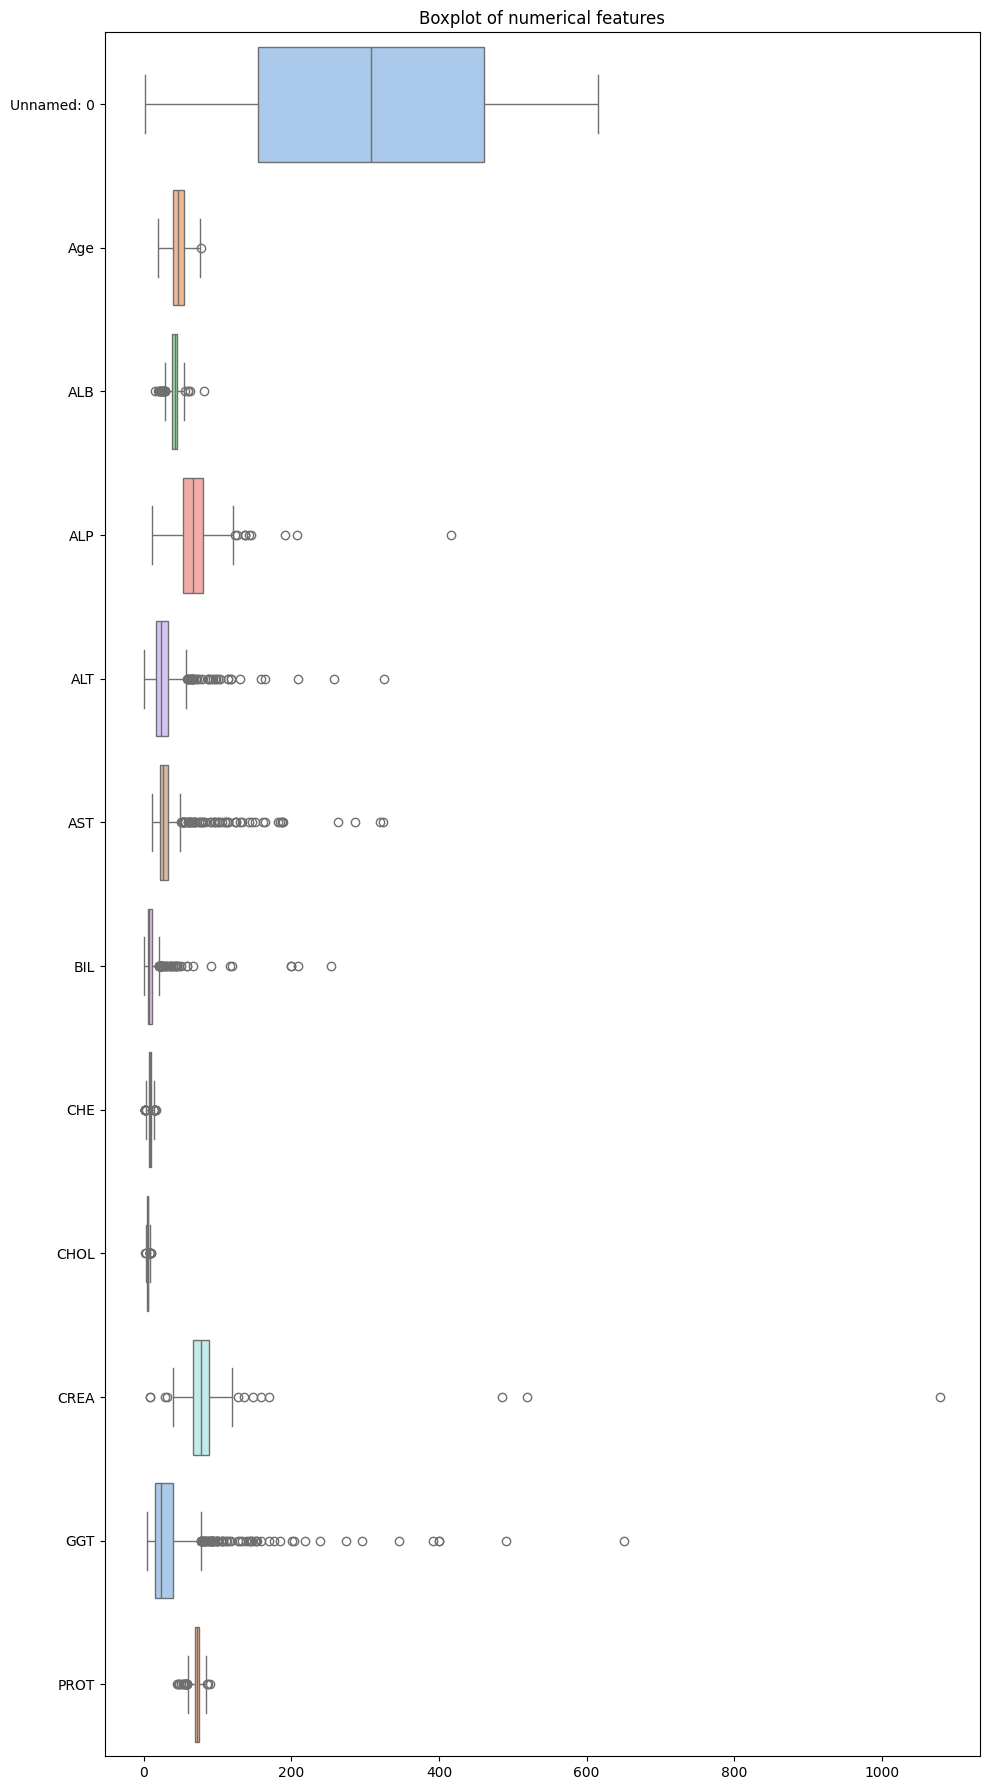

In [8]:
# draw boxplot from numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
def draw_boxplots(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if len(num_cols) == 0:
        print("The DataFrame has no numerical columns.")
        return

    plt.figure(figsize=(10, len(num_cols) * 1.5))
    sns.boxplot(data=df[num_cols], orient='h', palette="pastel")
    plt.title("Boxplot of numerical features")
    plt.tight_layout()
    plt.show()

draw_boxplots(df)

In [9]:
df['ALP'] = np.clip(df['ALP'], 0, 250)

In [10]:
df['CREA'] = np.clip(df['CREA'], 0, 200)

In [11]:
df['ALT'] = np.clip(df['CREA'], 0, 150)

In [12]:
df['AST'] = np.clip(df['CREA'], 0, 200)

In [13]:
df['BIL'] = np.clip(df['CREA'], 0, 150)

In [14]:
df['GGT'] = np.clip(df['CREA'], 0, 250)

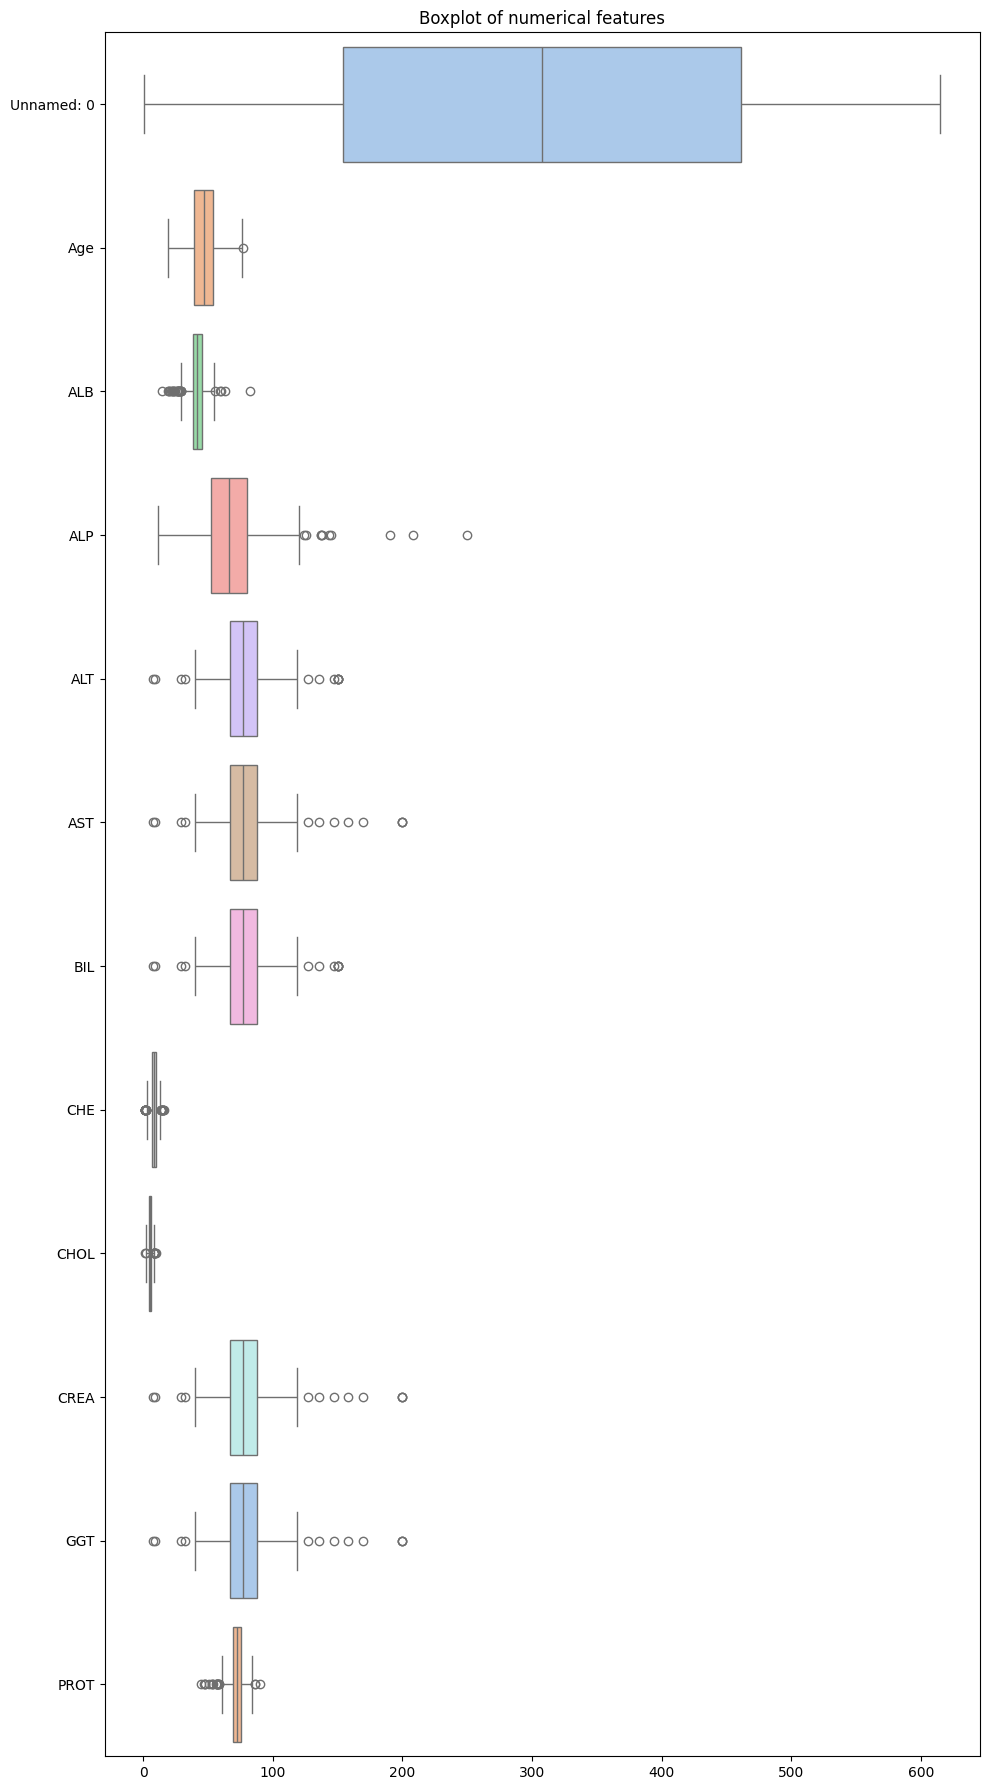

In [15]:
draw_boxplots(df)

In [16]:
# Print the df again to see how values have changed
print(numeric_df.head())
print(df.shape)

     Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA   GGT  PROT
599   59  36.0   49.7   5.2  110.1  37.0   2.29  3.68  118.2  56.9  74.8
403   45  37.5   54.3  12.9   14.8   5.9   6.95  5.29   66.0  49.4  70.1
192   49  44.3   84.1  29.0   29.0  16.2   8.18  4.65   87.0  21.9  70.8
263   58  44.0   56.0  30.6   33.0   4.8  12.37  6.33   74.0  58.7  75.8
231   53  44.8  119.7  29.2   20.7   6.0  13.80  8.78   64.0  49.3  75.4
(615, 14)


In [17]:
# Gather true labels for data and see if the train data is unbalanced

true_labels = []
for label in df['Category']:
  true_labels.append(int(label[0])) # append only the number of the label
class_counts = pd.Series(true_labels).value_counts().sort_index()
print("Number of samples in each class: ", class_counts)

Number of samples in each class:  0    540
1     24
2     21
3     30
Name: count, dtype: int64


In [18]:
# As one can see, there is A LOT more samples in class 0.
# We should oversample the samples with classes 1-3 to help manage the skewness
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
data_resized, true_labels = ros.fit_resample(numeric_df, true_labels)

print(data_resized.shape)
print(data_resized.head())
class_counts = pd.Series(true_labels).value_counts().sort_index()
print("Number of resampled samples in each class: ", class_counts) # Now the classes have same number of samples

(2160, 11)
   Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   59  36.0   49.7   5.2  110.1  37.0   2.29  3.68  118.2  56.9  74.8
1   45  37.5   54.3  12.9   14.8   5.9   6.95  5.29   66.0  49.4  70.1
2   49  44.3   84.1  29.0   29.0  16.2   8.18  4.65   87.0  21.9  70.8
3   58  44.0   56.0  30.6   33.0   4.8  12.37  6.33   74.0  58.7  75.8
4   53  44.8  119.7  29.2   20.7   6.0  13.80  8.78   64.0  49.3  75.4
Number of resampled samples in each class:  0    540
1    540
2    540
3    540
Name: count, dtype: int64


In [19]:
num_imputer = SimpleImputer(strategy='median')
data_resized = pd.DataFrame(num_imputer.fit_transform(data_resized), columns = data_resized.columns, index = data_resized.index)

In [20]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [21]:
scaler = StandardScaler()
data_resized = pd.DataFrame(scaler.fit_transform(data_resized), columns = data_resized.columns, index = data_resized.index)
data_resized.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.926981,-0.646786,-0.217747,-0.686630,0.582931,0.400463,-1.779791,-0.981970,0.276940,-0.253514,0.255080
1,-0.250583,-0.411507,-0.122742,-0.502064,-0.947428,-0.448112,-0.197148,0.401824,-0.222964,-0.326749,-0.485687
2,0.085864,0.655094,0.492727,-0.116153,-0.719400,-0.167072,0.220588,-0.148256,-0.021853,-0.595277,-0.375360
3,0.842869,0.608038,-0.087631,-0.077801,-0.655166,-0.478126,1.643608,1.295703,-0.146350,-0.235938,0.412690
4,0.422311,0.733520,1.227986,-0.111359,-0.852684,-0.445383,2.129269,3.401475,-0.242117,-0.327726,0.349646


In [22]:
print(data_resized.isnull().sum())

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=len(numeric_cols))
pca_data = pca.fit_transform(data_resized)

In [24]:
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.812057 -1.135821  0.152502  0.274969  0.300745 -0.433494  1.092001   
1  0.256413 -0.167478 -1.063626 -0.499425  0.306972 -0.028612 -0.174042   
2  0.520598  0.076949 -0.682191  0.002037  0.315504 -0.052876 -0.039337   
3  1.689916  1.074603 -0.230617 -0.666250  0.954689 -0.007367  0.356338   
4  2.283286  2.804354 -0.786058 -1.631584  0.724784  0.743227 -0.118829   

        PC8       PC9      PC10      PC11  
0  0.074648 -0.468561 -0.468566 -0.215915  
1 -0.411495 -0.479507 -0.169559  0.403135  
2 -0.555274  0.356575 -0.124371 -0.712352  
3  0.621123  0.320999  0.583643 -0.061743  
4  0.939654 -0.509354  0.667444 -0.718915  


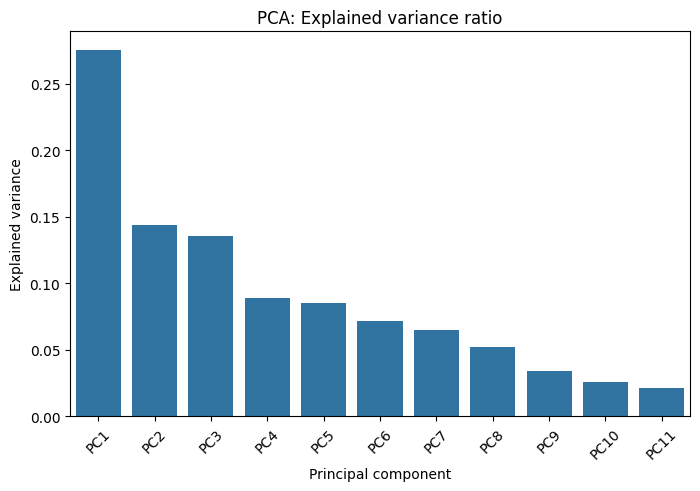

In [25]:
explained_variance = pca.explained_variance_ratio_

components = pca.components_

feature_names = data_resized.columns
top_features = [feature_names[np.argmax(np.abs(comp))] for comp in components]

plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('PCA: Explained variance ratio')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.xticks(rotation=45)
plt.show()

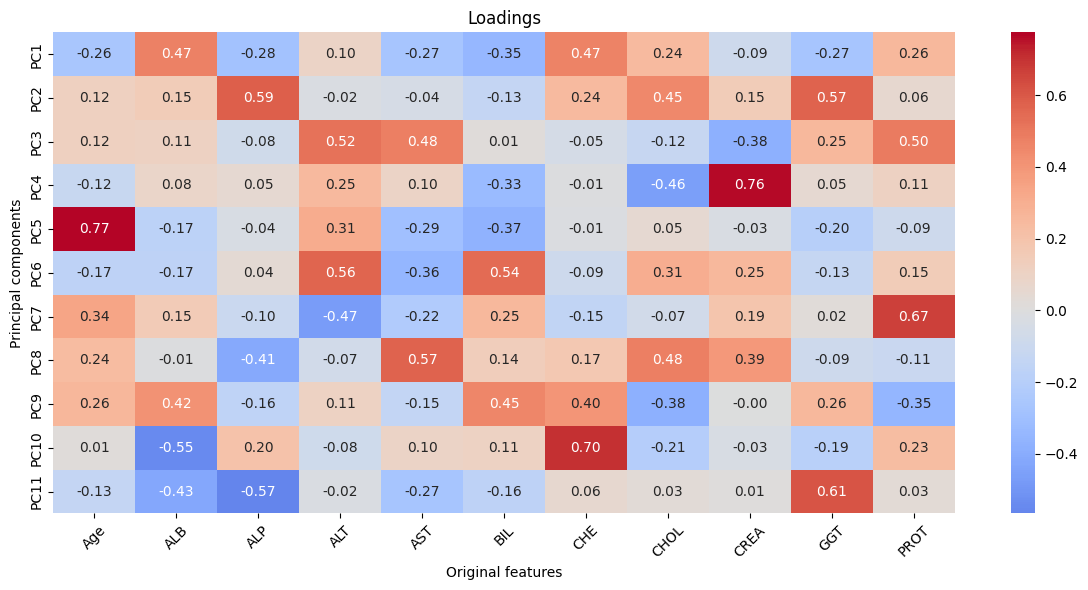

In [26]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]) # Component matrix: rows = PCs, columns = original variables
plt.figure(figsize=(12, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Loadings')
plt.xlabel('Original features')
plt.ylabel('Principal components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

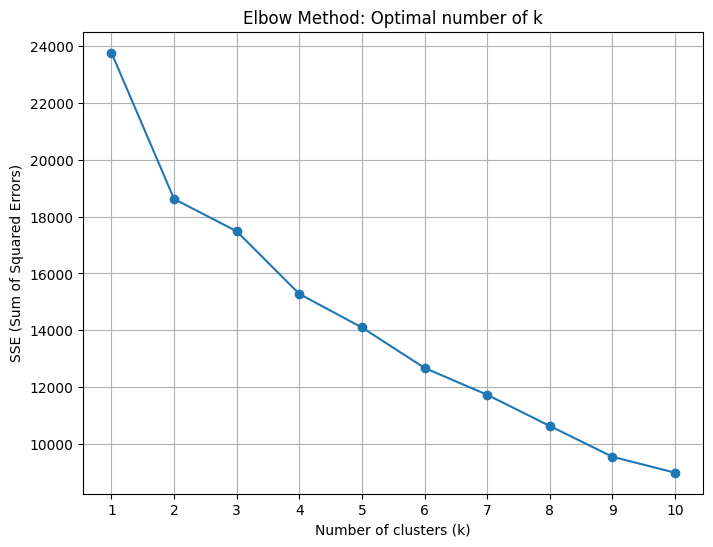

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_resized)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method: Optimal number of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

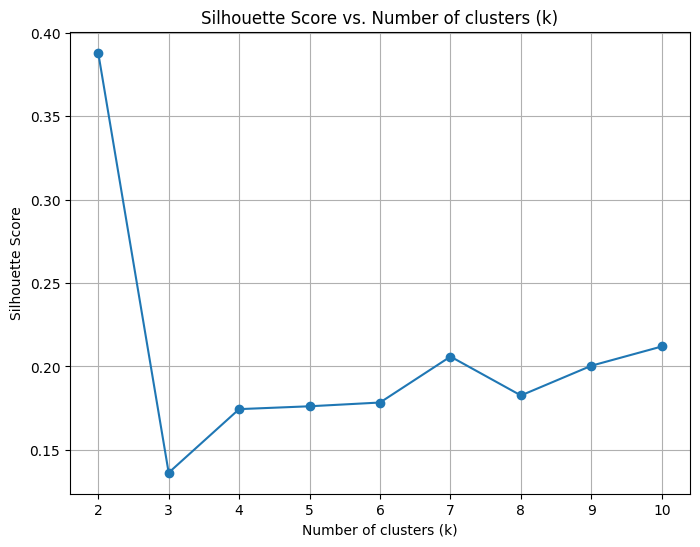

In [28]:
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_resized)
    score = silhouette_score(data_resized, kmeans.labels_)
    sil_scores.append(score)

# Silhouette score
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

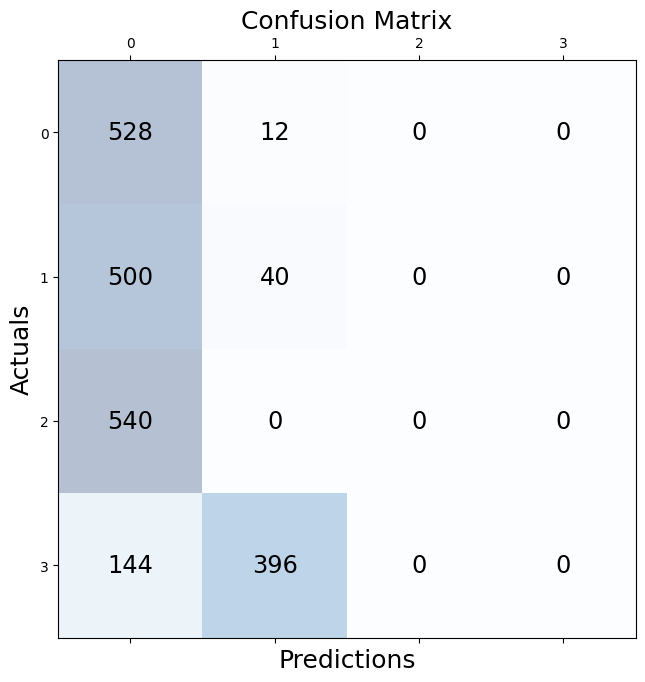

In [29]:
# Lets try KMeans for three principal components
from sklearn.metrics import confusion_matrix

pca_2 = PCA(n_components=5)
train_pca = pca.fit_transform(data_resized)

# KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

conf_matrix=confusion_matrix(true_labels, labels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

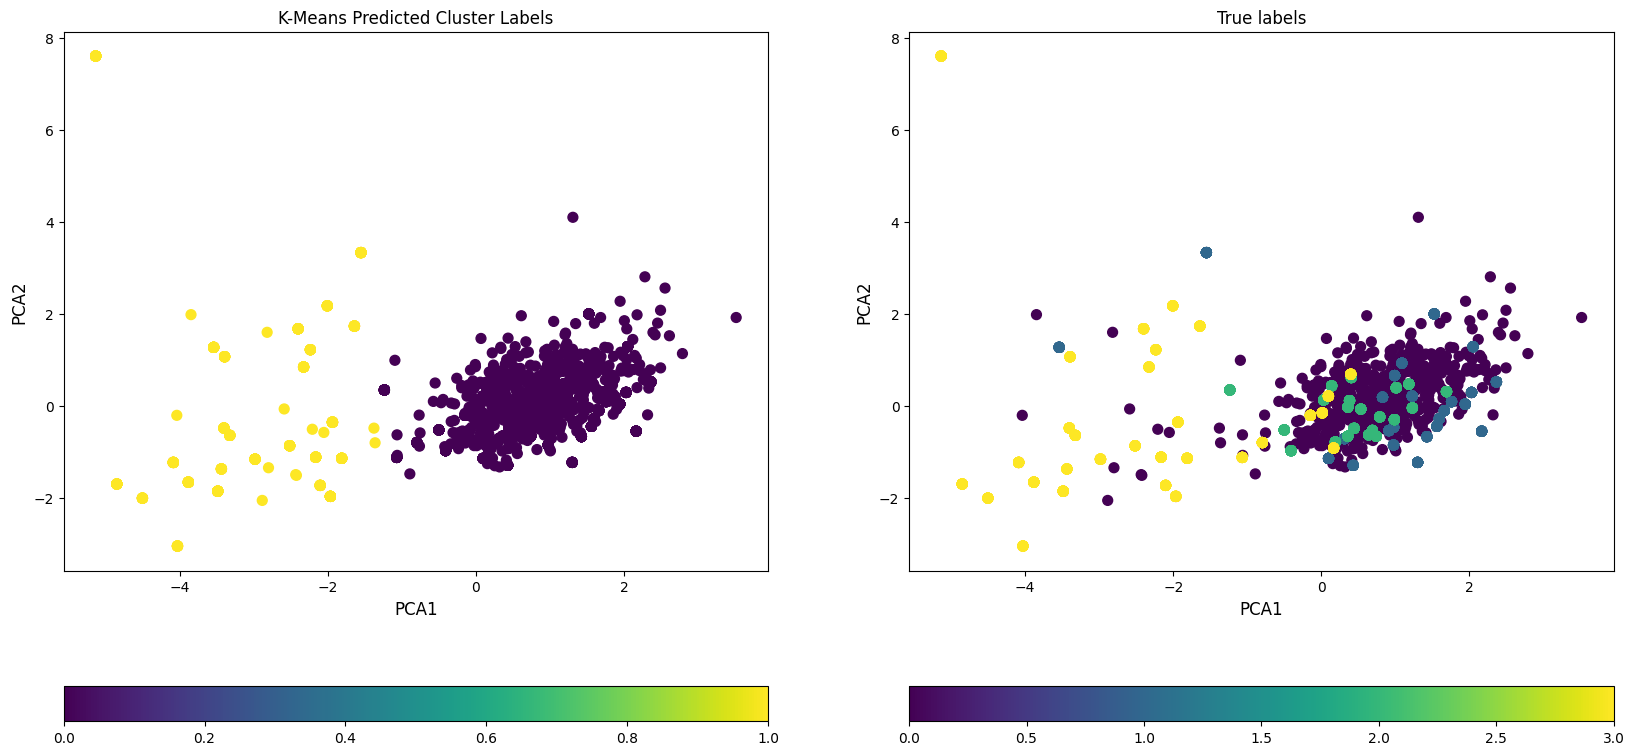

In [30]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(train_pca[:,0], train_pca[:,1], c=clusters, cmap='viridis', s=50)
ax1.set_xlabel("PCA1", fontsize=12)
ax1.set_ylabel("PCA2", fontsize=12)
ax1.set_title("K-Means Predicted Cluster Labels", fontsize=12)
plt.colorbar(plot1, ax = ax1, orientation ='horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(train_pca[:,0], train_pca[:,1], c=true_labels, cmap='viridis', s=50)
ax2.set_xlabel("PCA1", fontsize=12)
ax2.set_ylabel("PCA2", fontsize=12)
ax2.set_title("True labels", fontsize=12)
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


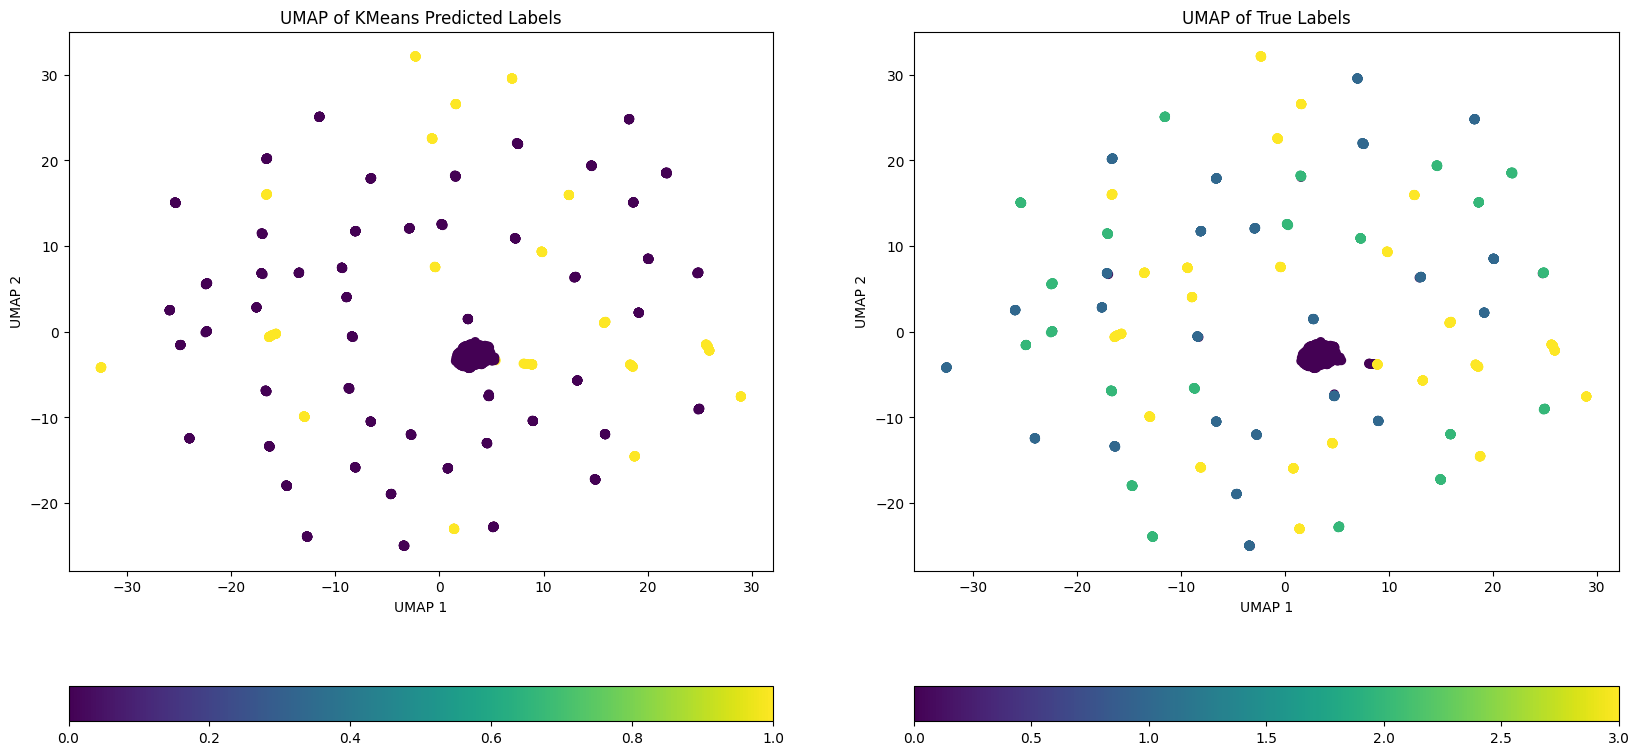

In [31]:
# UMAP plot
import umap
reducer = umap.UMAP(n_components = 2, random_state = 42)
res_umap = reducer.fit_transform(train_pca)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(res_umap[:,0], res_umap[:,1], c=clusters)
ax1.set_title("UMAP of KMeans Predicted Labels")
ax1.set_xlabel("UMAP 1")
ax1.set_ylabel("UMAP 2")
plt.colorbar(plot1, ax = ax1, orientation = 'horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(res_umap[:,0], res_umap[:,1], c=true_labels)
ax2.set_title("UMAP of True Labels")
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

plt.show()

In [32]:
# How well clustering succeeded
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
sil_score = silhouette_score(train_pca, clusters)
dbi = davies_bouldin_score(train_pca, clusters)
ch = calinski_harabasz_score(train_pca, clusters)

print(f"Davies-Bouldin Index: {dbi:.3f}")  # smaller is better
print(f"Calinski-Harabasz Index: {ch:.3f}") # bigger is better
print(f"Silhouette Score: {sil_score:.3f}")  #-1 and 1, closer to 1 is better

Davies-Bouldin Index: 1.671
Calinski-Harabasz Index: 596.083
Silhouette Score: 0.388


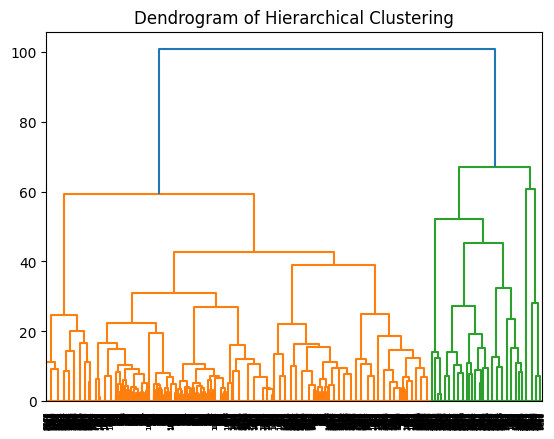

In [33]:
# Let's try hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

hierarch = linkage(data_resized, method="ward")
fig = plt.figure()
dn = dendrogram(hierarch)
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

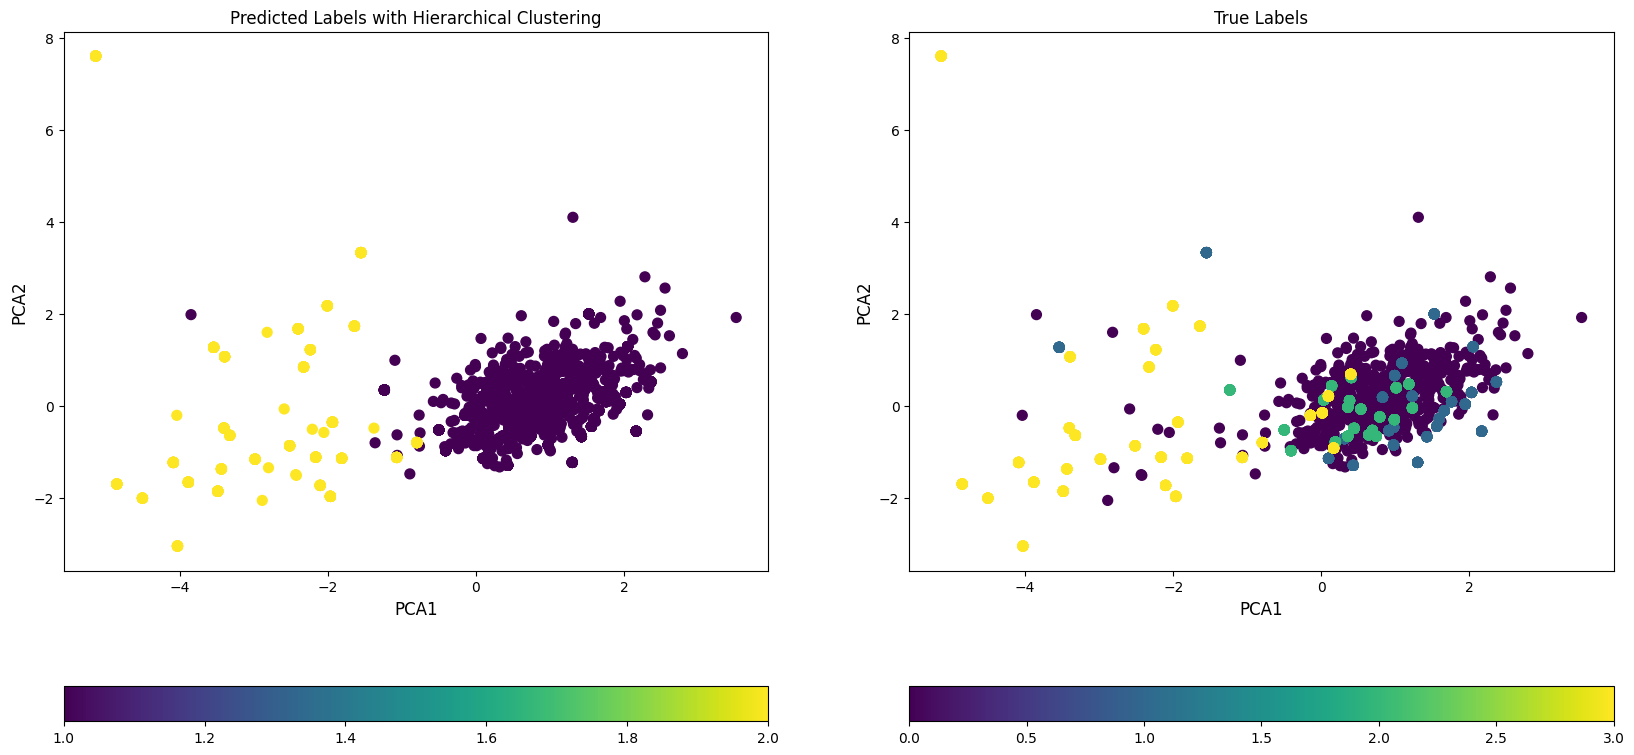

In [34]:
labels_hierarch = fcluster(hierarch, t=2, criterion='maxclust')

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(train_pca[:,0], train_pca[:,1], c=labels_hierarch, cmap='viridis', s=50)
ax1.set_xlabel("PCA1", fontsize=12)
ax1.set_ylabel("PCA2", fontsize=12)
ax1.set_title("Predicted Labels with Hierarchical Clustering", fontsize=12)
plt.colorbar(plot1, ax = ax1, orientation ='horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(train_pca[:,0], train_pca[:,1], c=true_labels, cmap='viridis', s=50)
ax2.set_xlabel("PCA1", fontsize=12)
ax2.set_ylabel("PCA2", fontsize=12)
ax2.set_title("True Labels", fontsize=12)
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

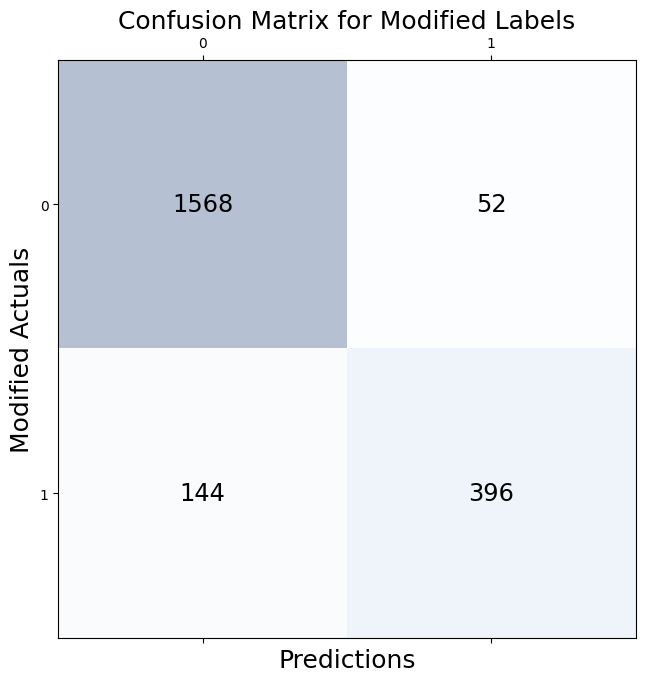

In [35]:
# Confusion matrix with modified true labels
# Label 0: Category 0, Label 1: Categories 1-3

mod_true_labels = []

for label in true_labels:
  if label == 3:
    mod_true_labels.append(1)
  else:
    mod_true_labels.append(0)

conf_matrix_mod=confusion_matrix(mod_true_labels, labels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_mod, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_mod.shape[0]):
    for j in range(conf_matrix_mod.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_mod[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Modified Actuals', fontsize=18)
plt.title('Confusion Matrix for Modified Labels', fontsize=18)
plt.show()

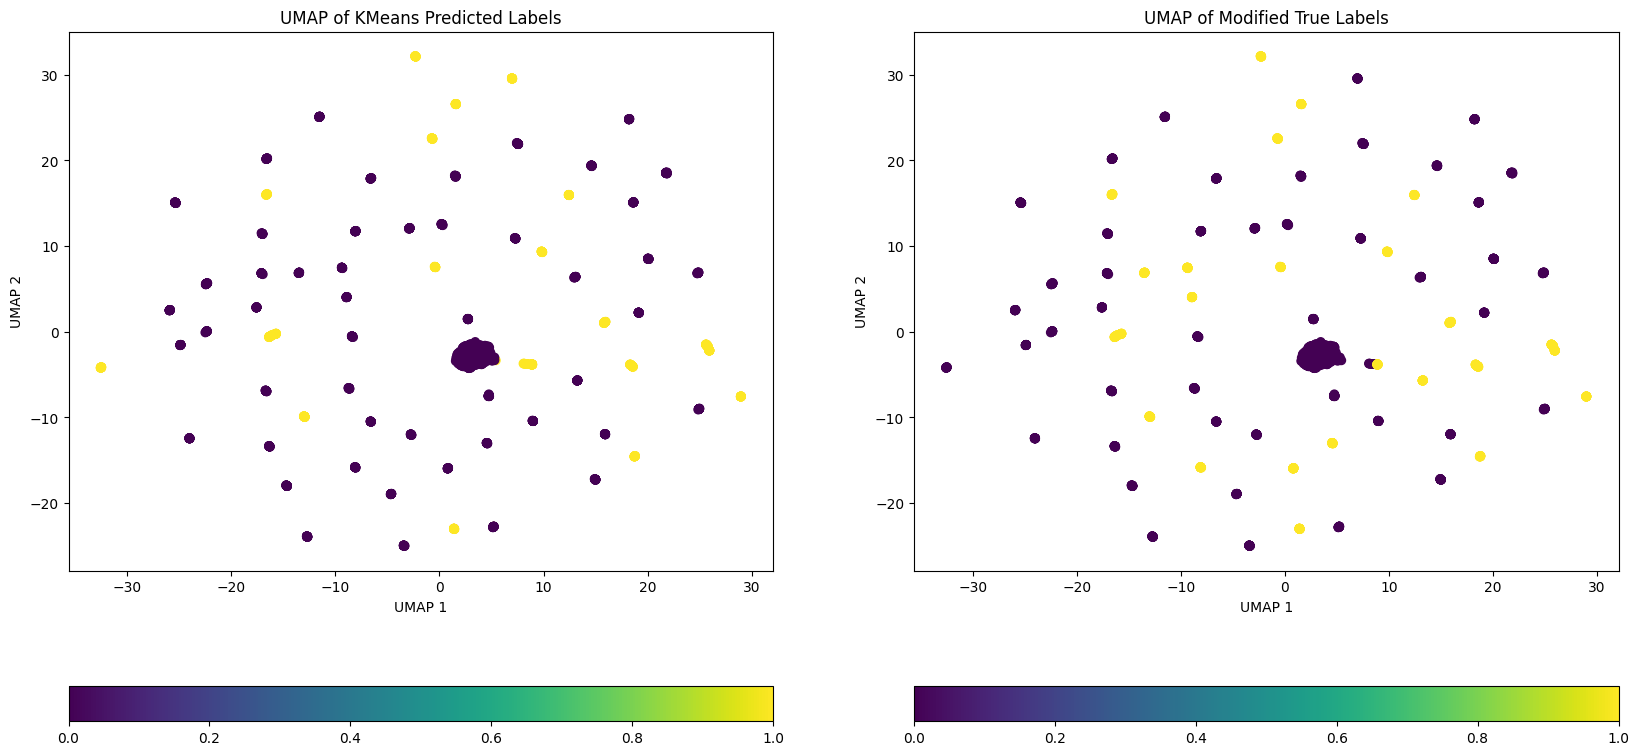

In [36]:
# UMAP plot for combined true labels

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(res_umap[:,0], res_umap[:,1], c=clusters)
ax1.set_title("UMAP of KMeans Predicted Labels")
ax1.set_xlabel("UMAP 1")
ax1.set_ylabel("UMAP 2")
plt.colorbar(plot1, ax = ax1, orientation = 'horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(res_umap[:,0], res_umap[:,1], c=mod_true_labels)
ax2.set_title("UMAP of Modified True Labels")
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

plt.show()